# 2. Short exploratory analysis of energy generation data from SMARD.de 

#### In this notebook:
- A quick first look at the SMARD wind power generated data (my project's target variable)
    - I looked at the daily data and later downloaded the intra-day (hourly) resolution

In [1]:
import sys
from pathlib import Path

import pandas as pd

In [53]:
# Get cwd path
cwd_path = Path.cwd()
data_path = cwd_path.parent / 'data'

In [57]:
# Get all SMARD CSV files, load into dataframes, and concat them
list_of_dataframes = []
for filepath in data_path.iterdir():
    if filepath.name.startswith('Realisierte_Erzeugung'):
        list_of_dataframes.append(pd.read_csv(filepath, sep=';'))

In [81]:
# Check that num of rows is what I expect after concatenating dfs
num_of_rows = 0
for df in list_of_dataframes:
    num_of_rows += len(df)
num_of_rows

2770

In [67]:
df = pd.concat(list_of_dataframes)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2770 entries, 0 to 577
Data columns (total 15 columns):
 #   Column                                                Non-Null Count  Dtype 
---  ------                                                --------------  ----- 
 0   Datum                                                 2770 non-null   object
 1   Anfang                                                2770 non-null   object
 2   Ende                                                  2770 non-null   object
 3   Biomasse [MWh] Berechnete Auflösungen                 2770 non-null   object
 4   Wasserkraft [MWh] Berechnete Auflösungen              2770 non-null   object
 5   Wind Offshore [MWh] Berechnete Auflösungen            2770 non-null   object
 6   Wind Onshore [MWh] Berechnete Auflösungen             2770 non-null   object
 7   Photovoltaik [MWh] Berechnete Auflösungen             2770 non-null   object
 8   Sonstige Erneuerbare [MWh] Berechnete Auflösungen     2770 non-null   obje

In [69]:
df.head(3)

,Datum,Anfang,Ende,Biomasse [MWh] Berechnete Auflösungen,Wasserkraft [MWh] Berechnete Auflösungen,Wind Offshore [MWh] Berechnete Auflösungen,Wind Onshore [MWh] Berechnete Auflösungen,Photovoltaik [MWh] Berechnete Auflösungen,Sonstige Erneuerbare [MWh] Berechnete Auflösungen,Kernenergie [MWh] Berechnete Auflösungen,Braunkohle [MWh] Berechnete Auflösungen,Steinkohle [MWh] Berechnete Auflösungen,Erdgas [MWh] Berechnete Auflösungen,Pumpspeicher [MWh] Berechnete Auflösungen,Sonstige Konventionelle [MWh] Berechnete Auflösungen
0,01.01.2016,00:00,00:00,"110.686,75","24.758,75","21.020,75","86.528,25","18.562,75","4.380,25","252.942,75","361.983,25","120.139,25",47.647,20.841,79.025
1,02.01.2016,00:00,00:00,"110.221,5","25.084,75",64.458,"341.620,25","9.403,5","4.113,75","248.804,75",303.554,"80.671,75","46.823,25","19.540,5",85.479
2,03.01.2016,00:00,00:00,"109.189,75","25.720,25","63.146,75","356.507,75","13.518,5","4.203,5","251.785,75","310.616,5",73.569,"48.986,25","19.351,5",75.070


In [70]:
df['Datum'] = pd.to_datetime(df['Datum'], format='%d.%m.%Y')

In [71]:
df['Datum'].max()

Timestamp('2023-08-01 00:00:00')

In [72]:
df['Datum'].min()

Timestamp('2016-01-01 00:00:00')

In [73]:
df.set_index('Datum', inplace=True)

### Keep only onshore wind power generation

In [74]:
onshore_wind = df['Wind Onshore [MWh] Berechnete Auflösungen']
onshore_wind

Datum
2016-01-01     86.528,25
2016-01-02    341.620,25
2016-01-03    356.507,75
2016-01-04     233.462,5
2016-01-05    160.886,25
                 ...    
2021-07-27    141.056,25
2021-07-28     254.246,5
2021-07-29       486.173
2021-07-30     272.700,5
2021-07-31    471.932,75
Name: Wind Onshore [MWh] Berechnete Auflösungen, Length: 2770, dtype: object

### Realised generation
Realized generation corresponds to net power generation. It includes the electricity generation fed into the grid minus the generating units' own requirements. Likewise, the data only include feed-ins to the general supply grid. Generation in the Deutsche Bahn grid and within industrial grids and closed distribution grids is not included in Realized Generation.

#### Convert (German) thousands and decimal seperators in values to (US/UK) decimal full stop format
- Values have units of megawatt hours (MWh)

In [75]:
translation_table = str.maketrans({'.': None, ',': '.'})
onshore_wind = onshore_wind.str.translate(translation_table).astype(float)

In [76]:
onshore_wind.describe()

count      2770.000000
mean     252138.239440
std      190404.141236
min       11681.250000
25%      108732.937500
50%      197019.875000
75%      344251.125000
max      962851.500000
Name: Wind Onshore [MWh] Berechnete Auflösungen, dtype: float64

### Unsurprisingly, the time series is cyclical with a positive trend!
- Peaks sort of happen in the new year during winters (Jan or Feb)

<Axes: xlabel='Datum'>

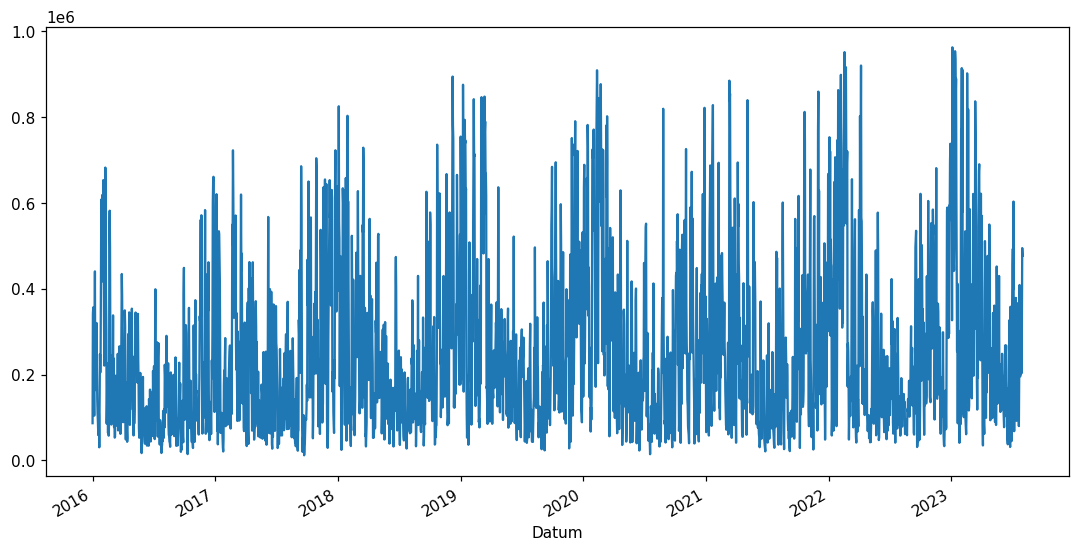

In [82]:
onshore_wind.plot(figsize=(12,6))